In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


170498071/170498071 [==============================] - 10s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

50000 training images and 10000 test images

In [4]:
X_test.shape

(10000, 32, 32, 3)

y_train is a 2D array convert this to now 1D array

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

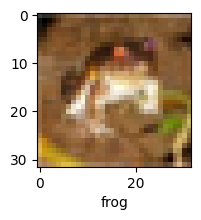

In [9]:
plot_sample(X_train, y_train, 0)

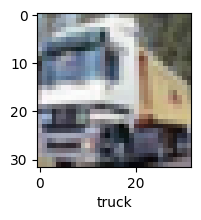

In [10]:
plot_sample(X_train, y_train, 1)

Normalizing traning data from 0 to 1. RGB channels range from 0 to 255

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Fit Model and Iterations

In [14]:
fitted = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 66s 41ms/step - loss: 1.4409 - accuracy: 0.4842 - val_loss: 1.1492 - val_accuracy: 0.6000
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0880 - accuracy: 0.6201 - val_loss: 1.0869 - val_accuracy: 0.6216
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9628 - accuracy: 0.6656 - val_loss: 0.9674 - val_accuracy: 0.6608
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8848 - accuracy: 0.6913 - val_loss: 0.9282 - val_accuracy: 0.6753
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8176 - accuracy: 0.7137 - val_loss: 1.0032 - val_accuracy: 0.6599
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7601 - accuracy: 0.7336 - val_loss: 0.9319 - val_accuracy: 0.6873
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7146 - accuracy: 0.7495 - val_loss: 0.9221 -

Evaluate the Model

In [15]:
test_loss, test_accuracy = cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9812 - accuracy: 0.6848


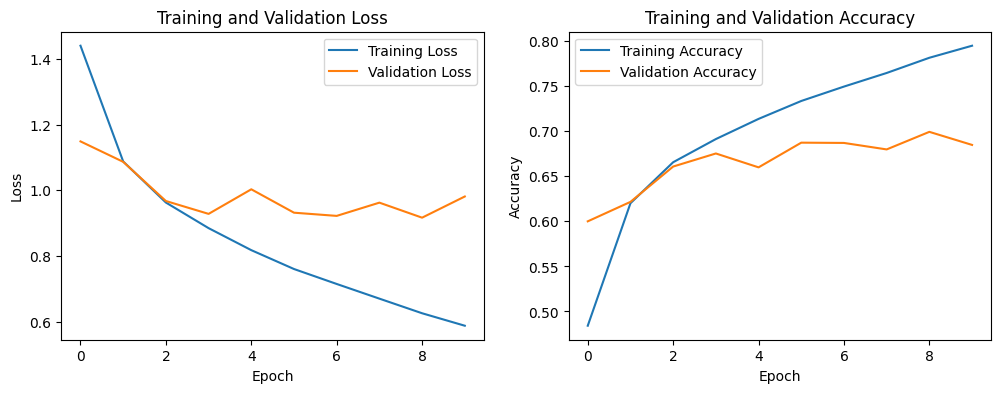

In [16]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fitted.history['loss'], label='Training Loss')
plt.plot(fitted.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(fitted.history['accuracy'], label='Training Accuracy')
plt.plot(fitted.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()